# Air Quality

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))

In [ ]:
from src.air_quality.air_quality_analysis import *
from src.air_quality.air_quality_graph import *

In [ ]:
features_2019 = get_2019_features(month_enum)

In [ ]:
features_2020 = get_2020_features(month_enum)

In [ ]:
normalized_features, normalized_features_sites = get_normalized_features(features_2019, features_2020, selected_sites)

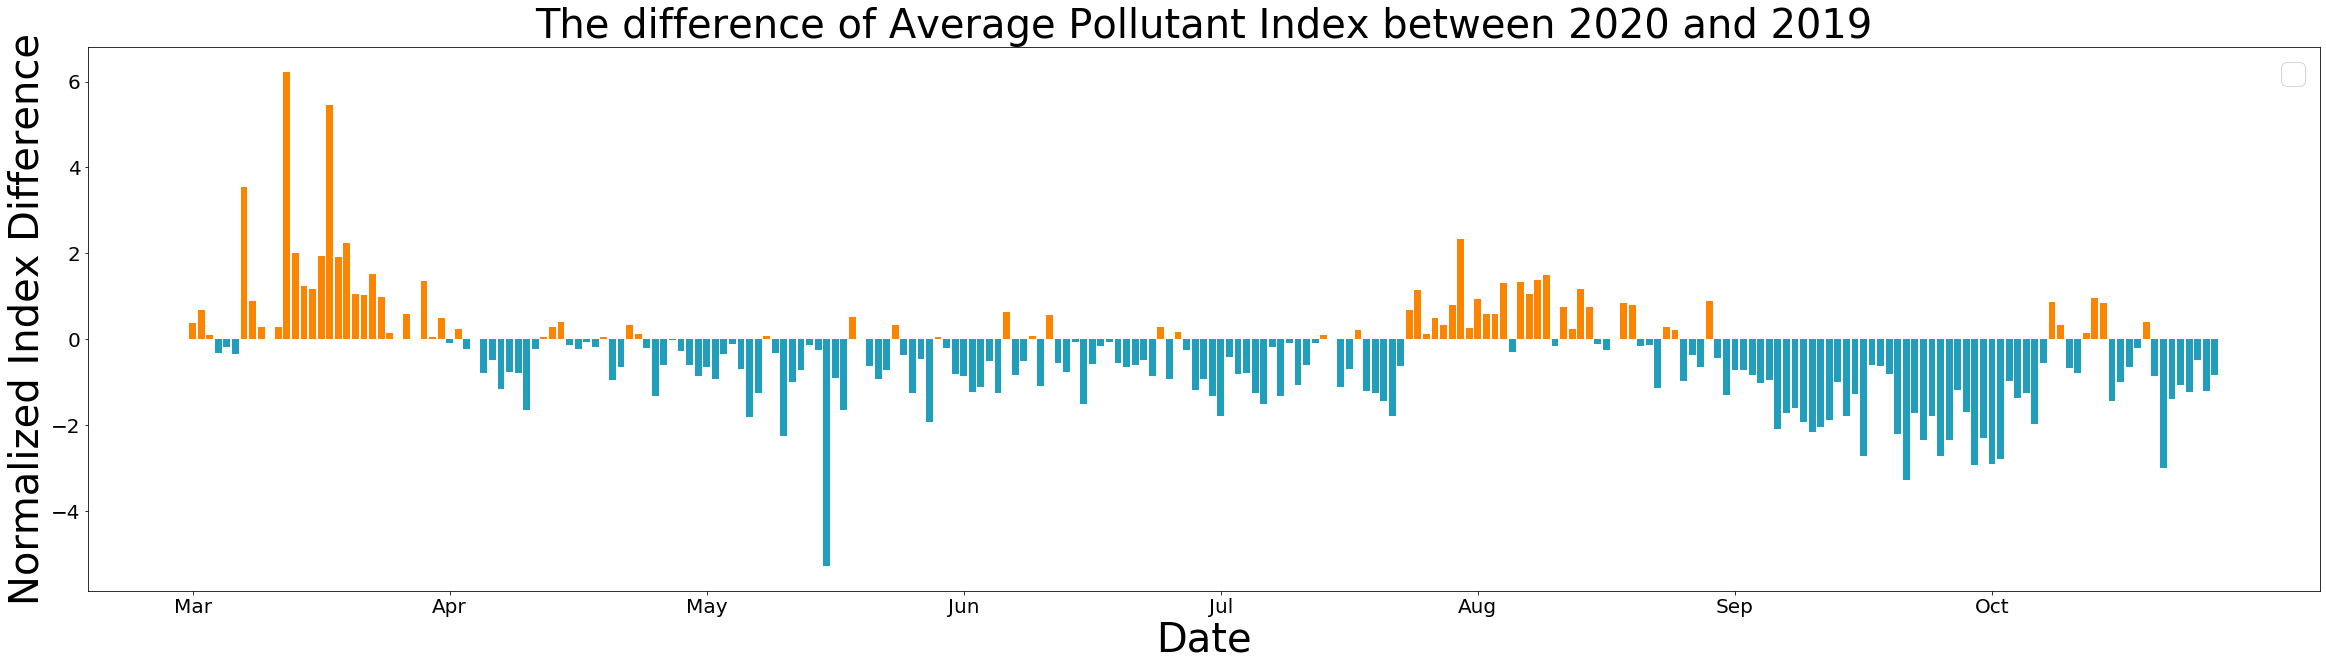

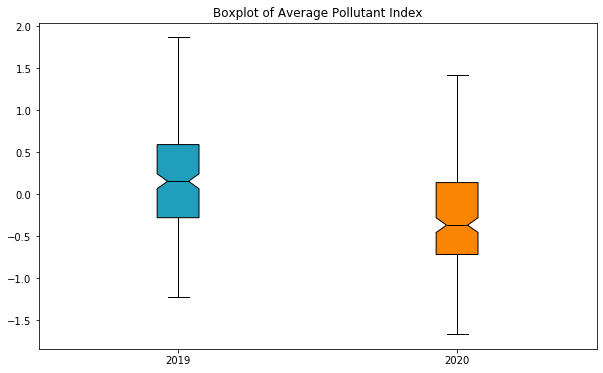

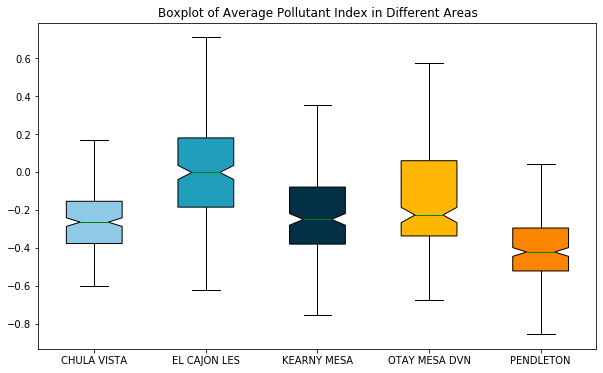

In [ ]:
get_graphs(normalized_features, normalized_features_sites, selected_sites)

# Economy

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))

In [ ]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [ ]:
from src.econ.data import *
from src.econ.fbpf import *

In [ ]:
econ_data_fp = '../data/econ/sd_businesses_active_since08_datasd_v1.csv'

In [ ]:
econ_data_fp

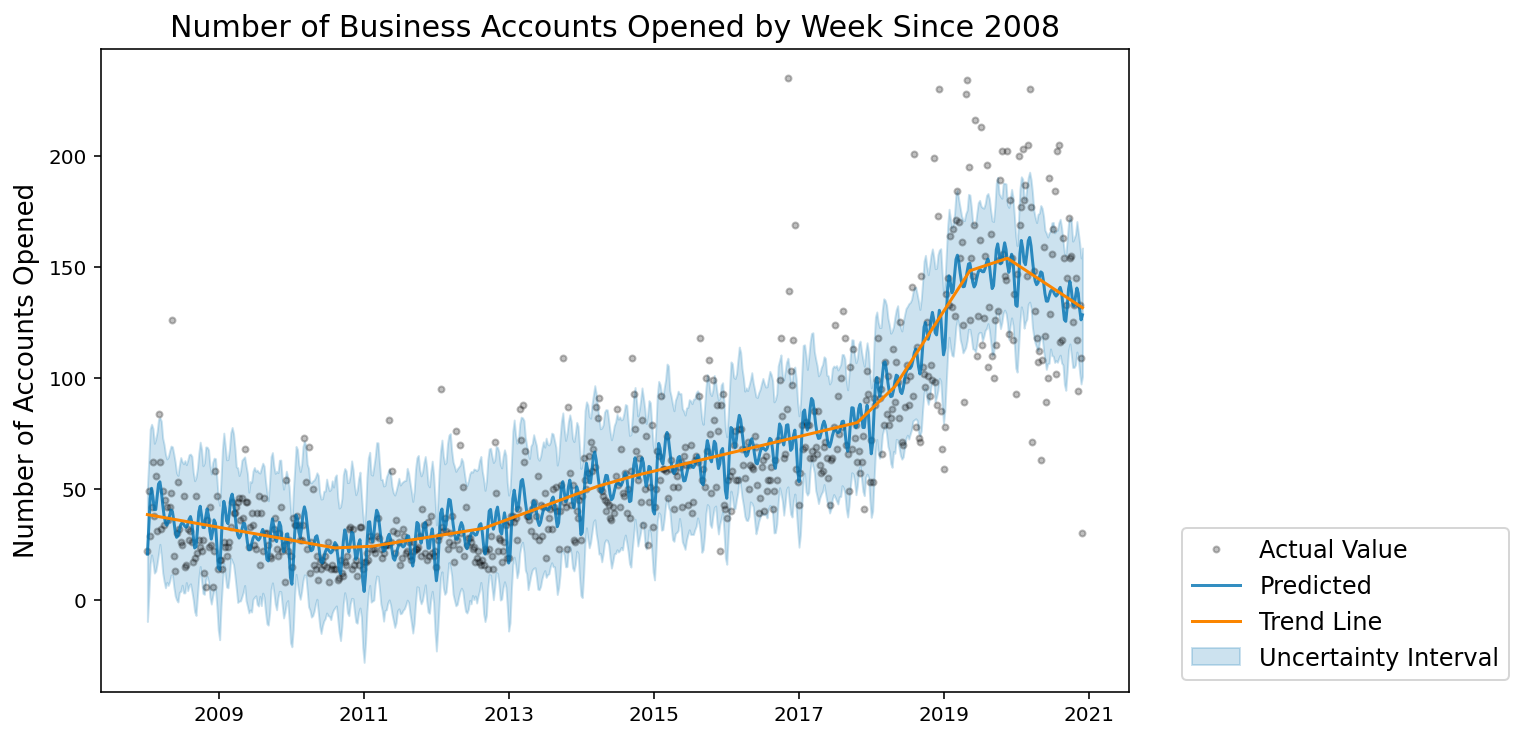

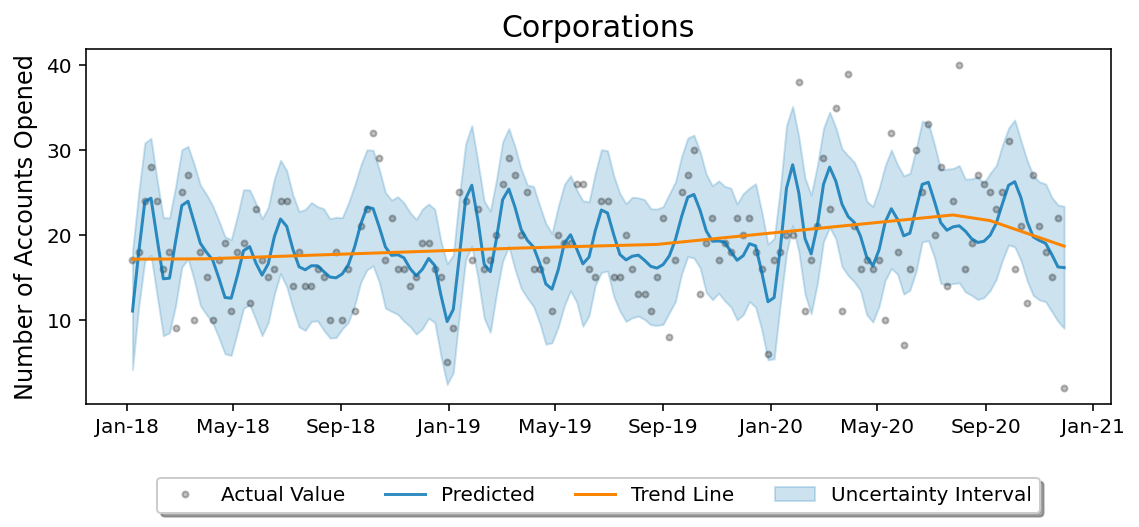

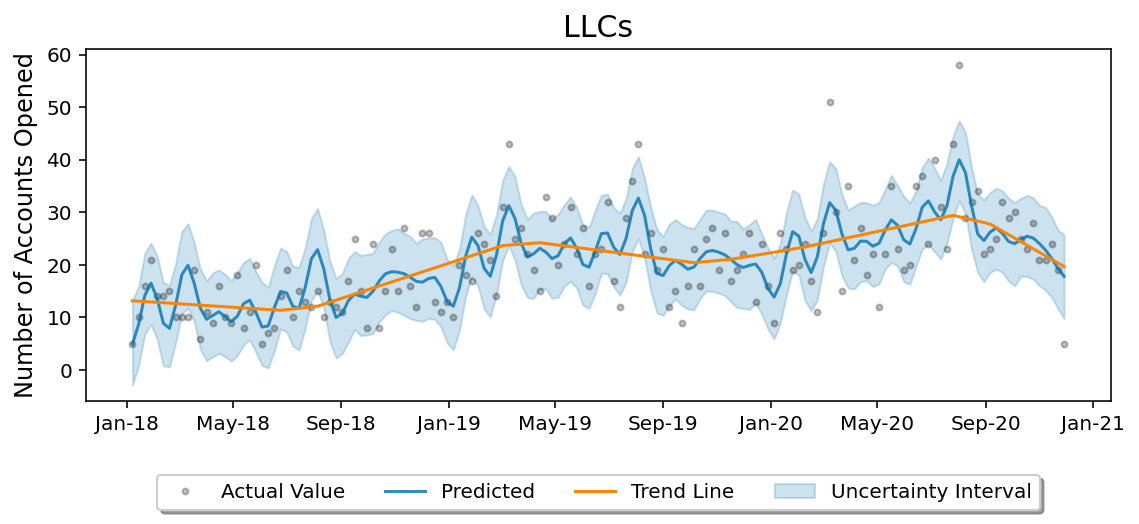

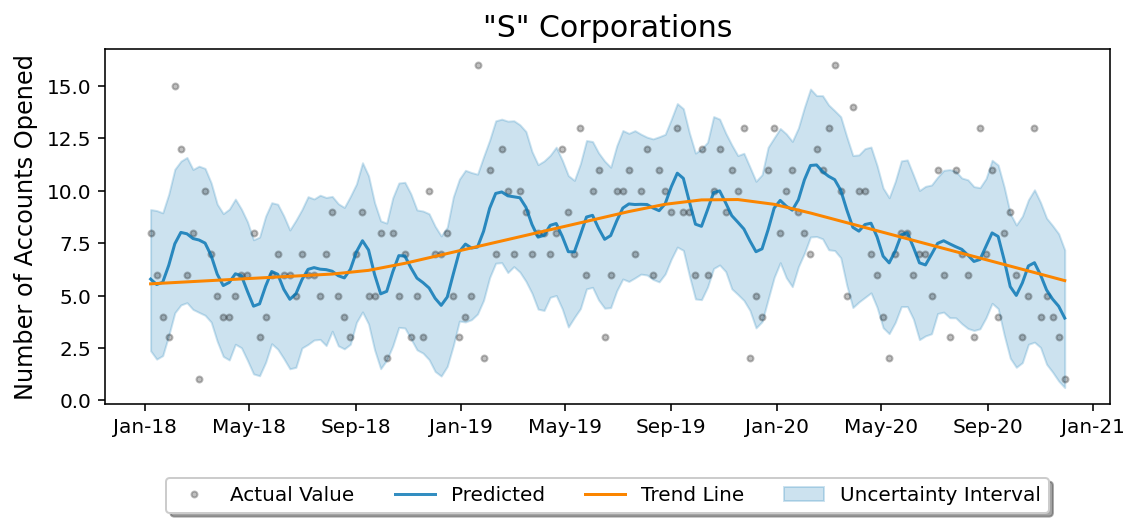

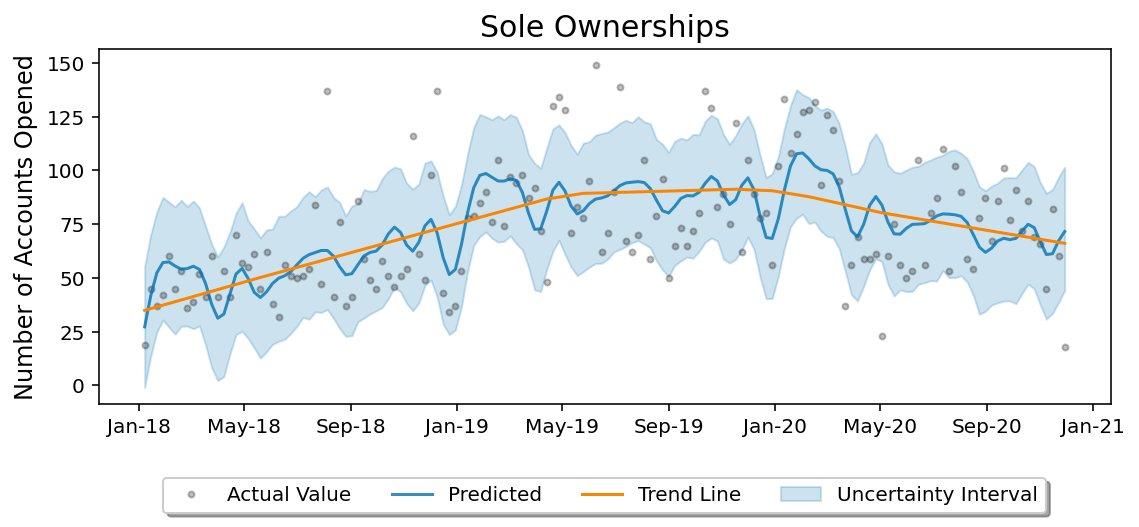

In [ ]:
make_figures(econ_data_fp)

In [ ]:
!ls figures

econ-1.png     econ-CORP.png  econ-LLC.png   econ-SCORP.png econ-SOLE.png


# SDGE

In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
sys.path.insert(0, os.path.abspath('../'))

%config InlineBackend.figure_format = 'retina'

from src.sdge.data import *

## Load 2019 - 2020 data

In [ ]:
year = ["2019","2020"] 
quarter = ["Q1","Q2","Q3","Q4"]
path = "../data/sdge/"

avgkwh_year = {} #dictionary containing avgkwh per month per customer type from 2019 to 2020
for y in year:
    avgkwh = {}
    for q in quarter:
        if not (y == "2020" and q == "Q4"):
            data = read_sdge_data(path,y,q,"ELEC")
            avgkwh.update(get_avgkwh_per_customer_month(data))
    avgkwh_year[y] = avgkwh
    

## Plot the difference between 2019-2020 per customer type

Ttest_indResult(statistic=2.3779857908437414, pvalue=0.03021277555079446)
Ttest_indResult(statistic=1.3447154722286725, pvalue=0.19747109099555998)
Ttest_indResult(statistic=-0.9296175963815667, pvalue=0.3663831476079482)


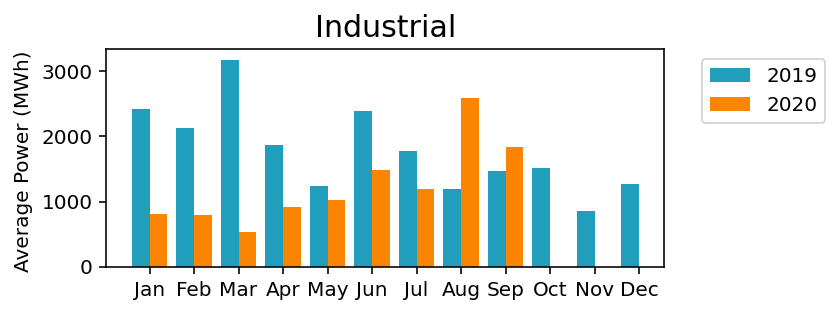

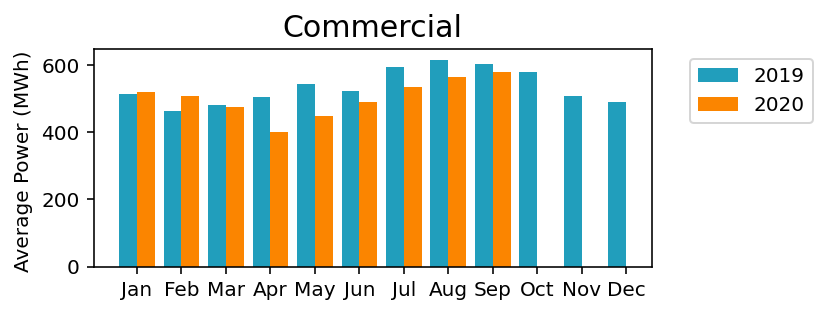

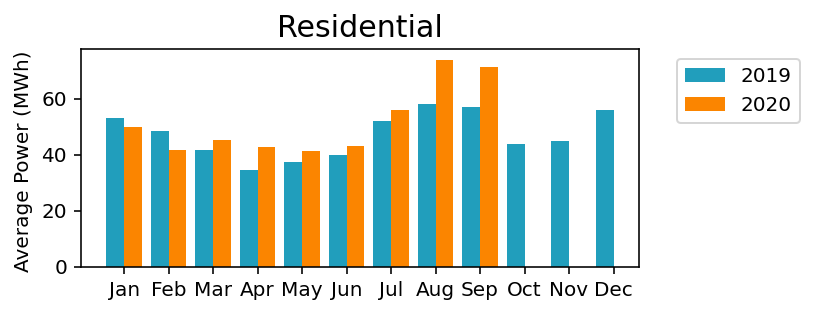

In [ ]:
customer = {'I':'Industrial','C':'Commercial','R':'Residential'}
month = np.arange(1,13)

for c in customer:
    d_19 = []
    d_20 = []
    for m in month:
        d_19.extend([avgkwh_year["2019"][str(m)+c]])
        if str(m)+c in avgkwh_year["2020"]:
            d_20.extend([avgkwh_year["2020"][str(m)+c] ])
    
    #plot
    plt.figure(figsize=(5,3))
    
    d_191 = [i/1e3 for i in d_19]
    d_201 = [i/1e3 for i in d_20]
    
    make_figure(d_191,d_201,customer[c])

# Mobility

In [ ]:
import sys, os
import matplotlib.pyplot as plt
import random

sys.path.insert(0, os.path.abspath('../'))

%config InlineBackend.figure_format = 'retina'

from src.mobility.data import *

## Load and Plot Mobility Data

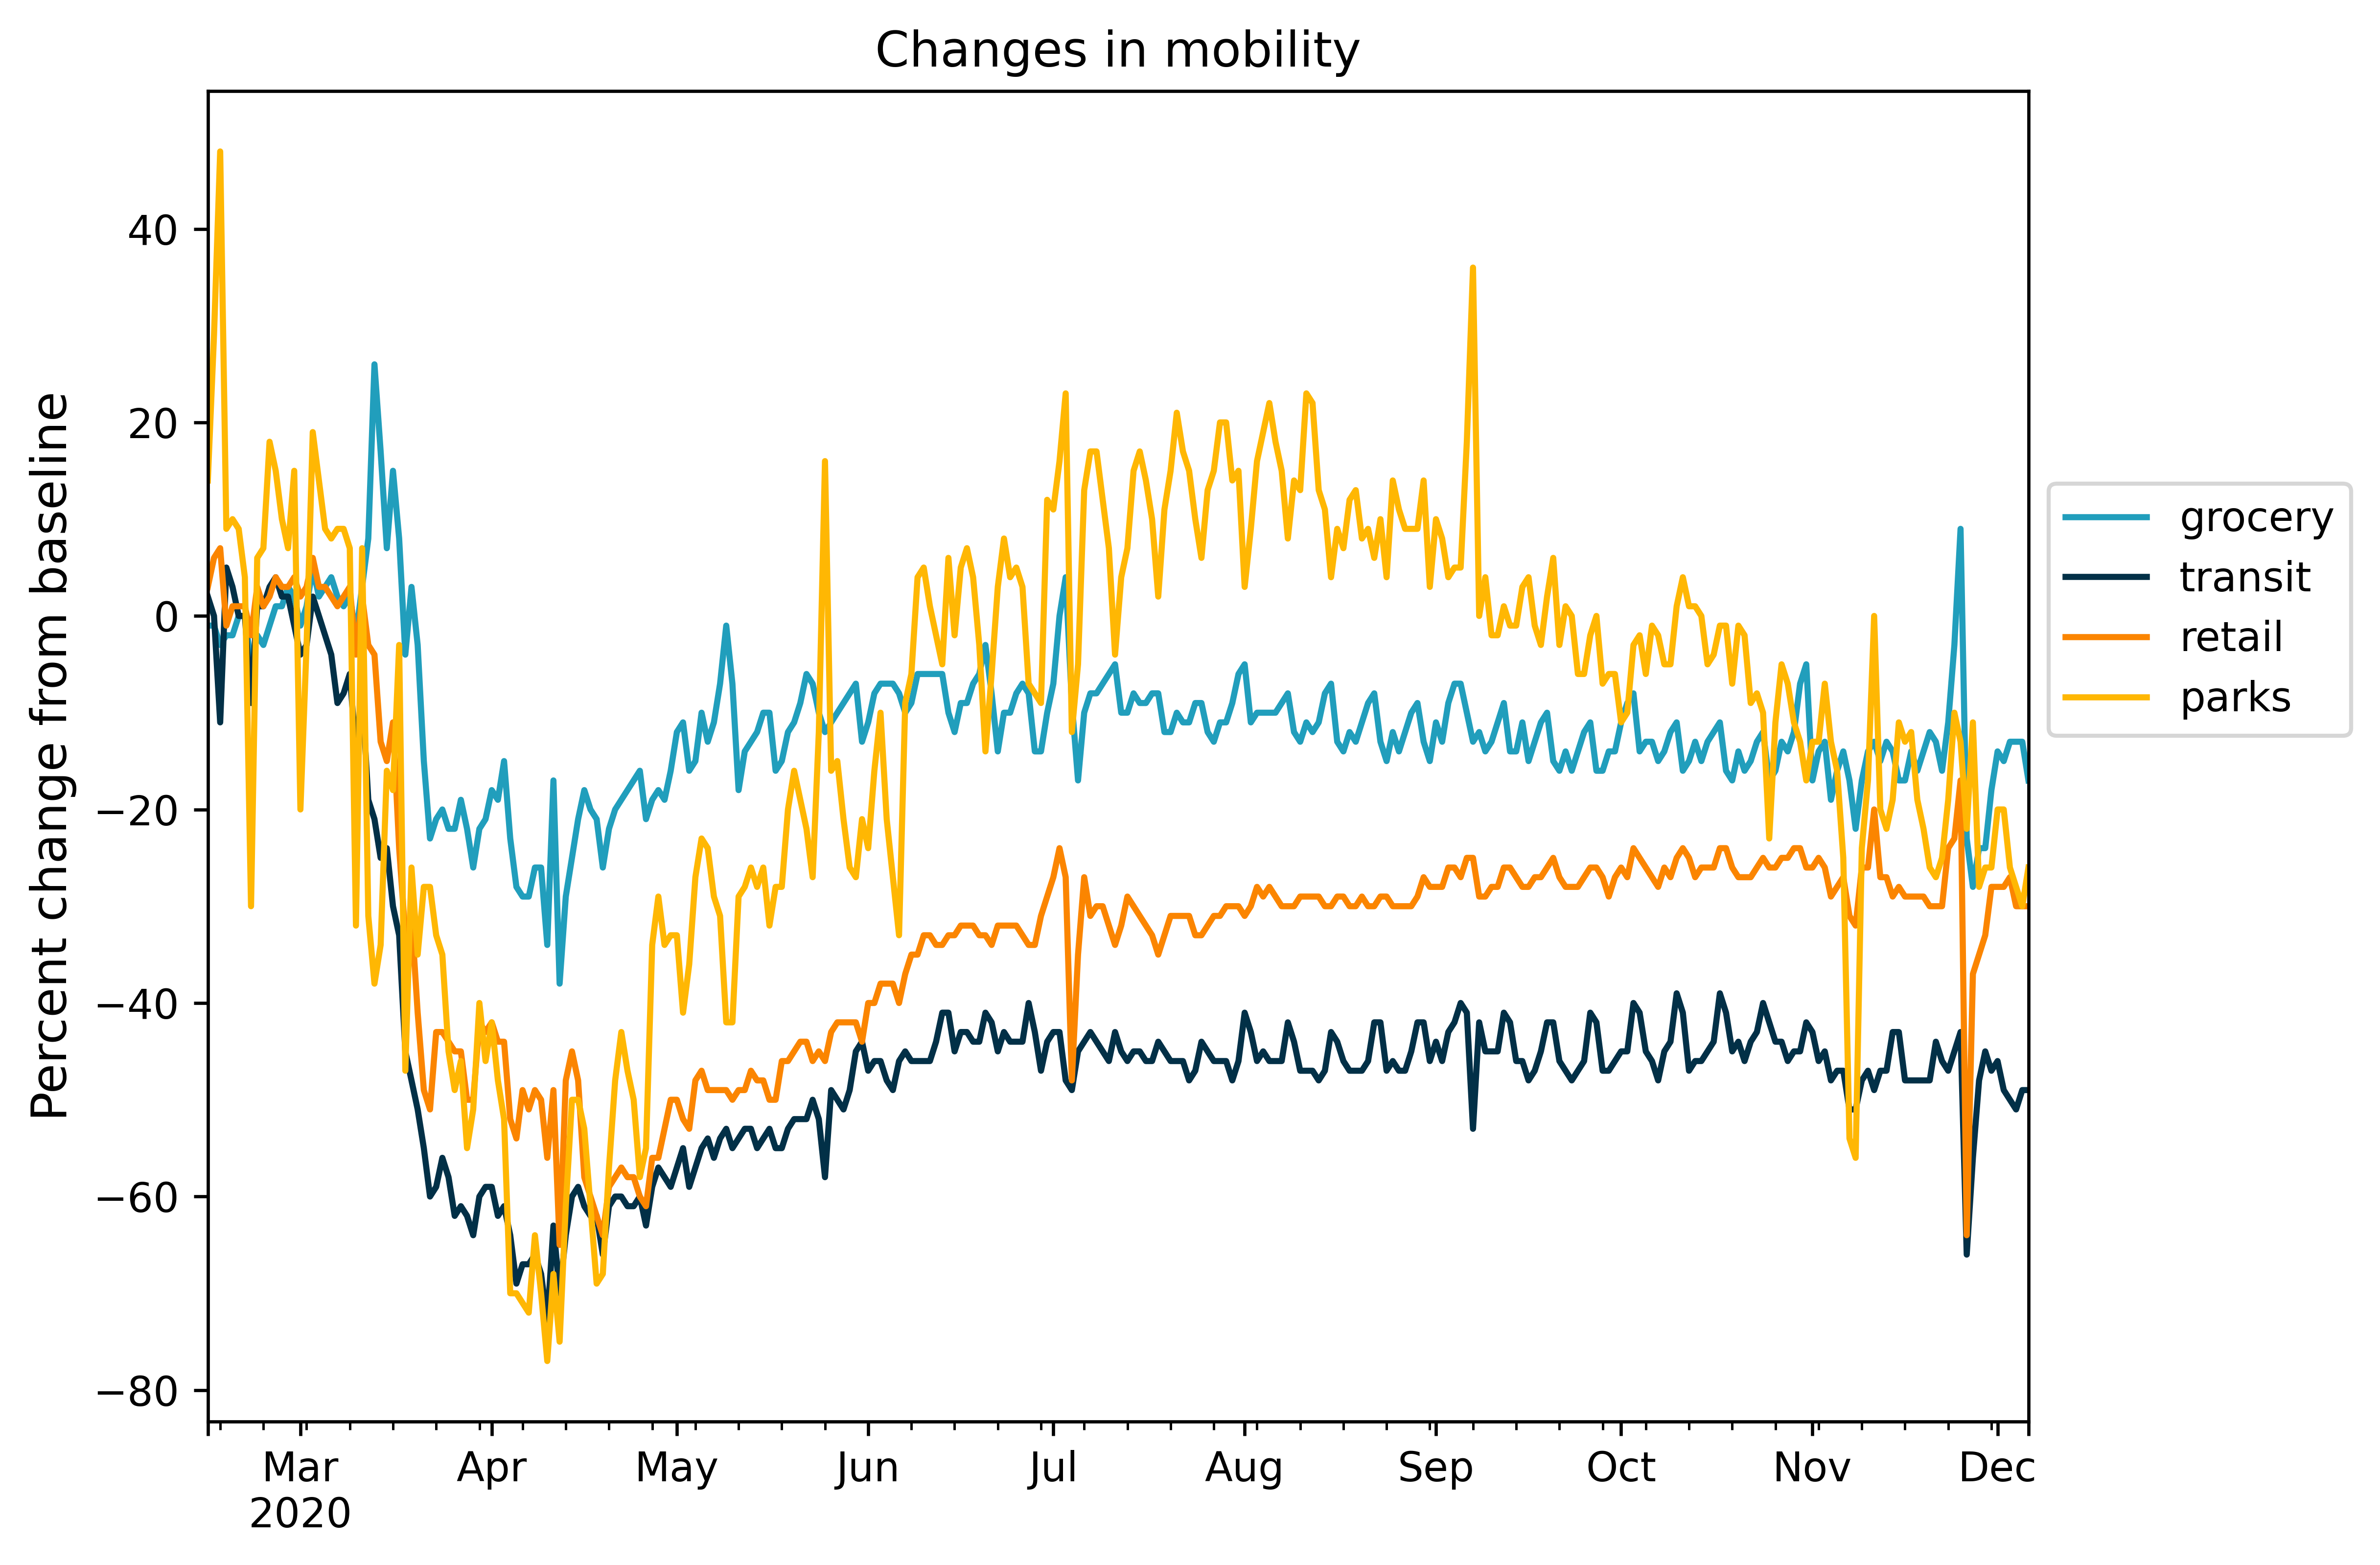

In [3]:
path = "../data/mobility/"

US_data = read_mobility_data(path)
SD_data = ingest_filter_data(US_data)

del US_data

choice_cols = ['retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential']
columns = random.sample(choice_cols, 4)

make_figure(SD_data, cols=columns)